This is where I house all the one-time converts. They wont be converted into classes since they are unlikely to be run again

They are documented here just in case anyone wonders how those derived data were created

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd
import numpy as np
import matplotlib as mpl
from utils import paths
import os

## GPR data: combining C138 and C195

output: GPS data from the joined set to be passed into to_gps_coords.py as gps_df

In [2]:
C138_df = pd.read_excel(os.path.join(paths.DATA_OCT, 'GPR Data for Corridor C138 Northgate to Caboolture.xlsx'), skiprows=2) # read data
C195_df =  pd.read_excel(os.path.join(paths.DATA_OCT, 'GPR Data for NCL C195 Theebine to Bundaberg 2015.xlsx'), skiprows=15) # read data

In [3]:
C138_df = C138_df.rename(columns={'Unnamed: 50': 'Surface Mudspot'})
cols = [c for c in C138_df.columns if c.lower()[:7] != 'unnamed']
C138_df = C138_df[cols] ## remove unnamed cols
C138_df['track_funcloc'] = 'C138'

In [4]:
C195_df = C195_df.rename(columns={'Unnamed: 56': 'Surface Mudspot', 'Line Code':'Line Segment', 'Track Code': 'Track ID'})
cols = [c for c in C195_df.columns if c.lower()[:7] != 'unnamed']
C195_df = C195_df[cols] ## remove unnamed cols
C195_df['track_funcloc'] = 'C195'

In [7]:
C138_df.columns

Index(['Division', 'Sub-division', 'Line Segment', 'Track ID',
       'Collection Date', 'Start KM', 'End KM', 'Geolink', 'Dec.Lat',
       'Dec.Long', 'PVC Value', 'Category', 'PVC Value.1', 'Category.1',
       'PVC Value.2', 'Category.2', 'Left*', 'Centre', 'Right*', 'Left*.1',
       'Centre.1', 'Right*.1', 'Left*.2', 'Centre.2', 'Right*.2', 'Left*.3',
       'Centre.3', 'Right*.3', 'Volume (cubic m)', 'Category.3',
       'Volume (cubic m).1', 'Category.4', 'Volume (cubic m).2', 'Category.5',
       'Category.6', 'Category.7', 'Category.8', 'Left*.4', 'Right*.4',
       'Surface Mudspot', 'track_funcloc'],
      dtype='object')

In [8]:
C195_df.columns

Index(['Division', 'Prefix', 'Line Segment', 'Track ID', 'Collection Date',
       'GPR Run Number', 'Laser Run number', 'Start KM', 'End KM', 'Geolink',
       'Dec.Lat', 'Dec.Long', 'PVC Value', 'Category', 'PVC Value.1',
       'Category.1', 'PVC Value.2', 'Category.2', 'Left*', 'Centre', 'Right',
       'Left*.1', 'Centre.1', 'Right.1', 'Left*.2', 'Centre.2', 'Right.2',
       'Left*.3', 'Centre.3', 'Right.3', 'Left*.4', 'Centre.4', 'Right*',
       'Left*.5', 'Centre.5', 'Right*.1', 'Volume (cubic m)', 'Category.3',
       'Volume (cubic m).1', 'Category.4', 'Volume (cubic m).2', 'Category.5',
       'Surface Mudspot', 'track_funcloc'],
      dtype='object')

In [9]:
col_to_filter= ['Line Segment', 'Track ID', 'Collection Date', 'Start KM', 'End KM', 'Dec.Lat', 'Dec.Long', 'track_funcloc' ]
GPS_data = pd.concat([C138_df[col_to_filter], C195_df[col_to_filter]])

In [10]:
GPS_data.head()

,Line Segment,Track ID,Collection Date,Start KM,End KM,Dec.Lat,Dec.Long,track_funcloc
0,823,101,2018-10-02,10.87900,10.88402,-27.392978,153.069371,C138
1,823,101,2018-10-02,10.88402,10.88904,-27.392933,153.069382,C138
2,823,101,2018-10-02,10.88904,10.89406,-27.392886,153.069393,C138
3,823,101,2018-10-02,10.89406,10.89908,-27.392839,153.069403,C138
4,823,101,2018-10-02,10.89908,10.90411,-27.392795,153.069412,C138


In [11]:
GPS_data.to_csv(os.path.join(paths.DATA_DERIVED, 'C138_C195_coords.csv'))

# Combining work orders with track codes
output: work-order data with the track codes (output of track_code_matching.py) in a single column

used as input for to_gps_coords.py as df_to_match

In [3]:
tc = pd.read_csv(os.path.join(paths.DATA_DERIVED, "track_code_translated.csv"))
work_orders = pd.read_excel(os.path.join(paths.DATA_OCT, "Work Orders for Corridors C138 and C195 10.10.2019 including costs.xlsx"))

In [4]:
work_orders.head()

,Planner group,Order Type,Order,Description,Lin.Ref.Pattern,Start Point,End Point,Length,Bas. start date,Basic fin. date,...,TotalPlnndCosts,Total act.costs,SystemCondition,Notification,Notifcn Status,WBS element,Plant section,Main WorkCtr,MaintActivType,MAT descriptn
0,SEQ,NS01,6100045277,Robinson Rd Overpass Splay 14-15,C138,14.595,14.605,0.010,2012-07-02,2015-03-31,...,1086.0,65265.05,1,NaN,NaN,NaN,STU,MRH03,N31,Mechanised Resleepering
1,RSS,NS04,6400003777,Lvl Xing Recon 13.350 - 13.400km Bilsen,C138,11.000,51.000,40.000,2014-07-01,2015-09-30,...,3896.6,14280.25,T,NaN,NaN,NaN,TRK,MSR01,N32,Mechanised Resurfacing
2,SEQ,NS01,6100037532,LIFT & PACK 24.650 to 24.770km middle rd,C138,24.650,24.770,0.120,2015-01-12,2015-02-11,...,4170.0,3432.00,T,1100021790,NOCO ORAS,NaN,TRK,MSF11,N53,Top & Line Spot Resurfacing
3,SEQ,NS01,6100048397,LIFT & PACK 25.678 to 25.680km DOWN rd,C138,11.000,51.000,40.000,2015-01-12,2015-04-12,...,2514.0,799.20,T,1100021792,NOCO ORAS,NaN,TRK,MSF11,N53,Top & Line Spot Resurfacing
4,SEQ,NS01,6100017640,lift and pack 780 points up road,C138,36.445,36.445,0.000,2015-02-02,2015-03-04,...,3432.0,3312.00,T,1100023230,NOCO ORAS,NaN,NaN,MSF06,N53,Top & Line Spot Resurfacing


In [5]:
work_order_with_track_code = work_orders.merge(tc, on='Order')

In [6]:
work_order_with_track_code.to_csv(os.path.join(paths.DATA_DERIVED, 'work_orders_with_track_code.csv'), index = False)

# Track Recording data 

Preparing data for use with joining to GPS

In [10]:
os.listdir(paths.DATA_DERIVED)

['C138_C195_coords.csv',
 'gps_data.csv',
 'track_code_translated.csv',
 'work_orders_with_coords.csv',
 'work_orders_with_track_code.csv']

In [8]:
track_id = os.listdir(paths.TRC)[0][:6]

In [7]:
df = pd.read_csv(os.path.join(paths.TRC, '531401 - DM A 0-9.69 NORTHGATE-SANDGATE-201701311116.csv'), skiprows = 4)


In [19]:
gps_data = pd.read_csv(os.path.join(paths.DATA_DERIVED, 'gps_data.csv'))

In [12]:
gps_data.columns

Index(['Unnamed: 0', 'Division', 'Sub-division', 'Line Segment', 'Track ID',
       'Collection Date', 'GPR Run Number', 'Laser Run number', 'Start KM',
       'End KM', 'Geolink', 'Dec.Lat', 'Dec.Long'],
      dtype='object')

In [20]:
gps_data['Line Segment'] = gps_data['Line Segment'].apply(lambda x: str(x))

In [27]:
gps_data['Track ID'] = gps_data['Track ID'].apply(lambda x: str(x))

In [29]:
filteredf = gps_data[(gps_data['Line Segment']== "531")& (gps_data['Track ID']== '401') ]

In [33]:
long = filteredf['Dec.Long'].values
lat = filteredf['Dec.Lat'].values
KM = filteredf['Start KM'].values

In [37]:
gps_data.shape[0]

170551

In [34]:
np.interp(10.02,KM, lat)

-27.322295

In [35]:
np.interp(10.02,KM, long)

153.069842

## Track code matching for speed classification data

In [2]:
from track_code_matching import *

In [9]:
speed_class = pd.read_excel(os.path.join(paths.DATA_OCT, 'Speed and Curve linear classification data.xls.xlsx'))

In [9]:
code_ref_4th = pd.ExcelFile(os.path.join(paths.DATA_OCT, '4th Level LRP to 3 Digit Track Code.xlsx'))
code_ref_step1= pd.read_excel(code_ref_4th, 'Matrix')
code_ref_step2 =  pd.read_excel(os.path.join(paths.DATA_OCT, '5th Level LRP to 4th Digit Track Code.xlsx.xlsx')).iloc[:7,:]
code_ref_step2a = pd.read_excel(os.path.join(paths.DATA_OCT, 'LRP Details.xlsx'))
code_ref = pd.ExcelFile(os.path.join(paths.DATA_OCT, 'Track Code List_2.xlsx'))
code_ref = pd.read_excel(code_ref)
code_ref['Track code'] = code_ref['Track code'].map(lambda x: str(x))

In [5]:
trans = Translate_Location(code_ref_step1, code_ref_step2, code_ref_step2a, code_ref, speed_class)

In [6]:
track_code_translated = trans.funcloc_to_trackcode()

In [8]:
track_code_translated.columns= ['rownum', 'Track codes']

In [12]:
speed_class_with_track_codes = speed_class.join(track_code_translated)

In [15]:
speed_class_with_track_codes.to_csv('speed_class_with_track_codes.csv')

## Add GPS coordinates to speed data

In [2]:
from to_gps_coords import *

In [3]:
speed_class_with_track_codes = pd.read_csv('speed_class_with_track_codes.csv')
## to GPS coordinate
gps_df = pd.read_csv(os.path.join(paths.DATA_DERIVED, 'C138_C195_coords.csv')) 
output = Match_gps(gps_df, speed_class_with_track_codes, track_funcloc = "C138").speed_to_gps()
ans = output.merge(speed_class_with_track_codes)

In [4]:
ans.to_csv(os.path.join(paths.DATA_DERIVED, 'speed_and_curve_coord.csv'), index = False)

## matching clverts with GPS coordiates

In [2]:
from track_code_matching import *

In [5]:
culvert_crossing = pd.read_excel(os.path.join(paths.DATA_OCT, 'Track Culvert and Level Crossing data.xlsx'))

In [8]:
culvert_crossing = culvert_crossing.rename(columns = {'Functional Loc.': 'culvert_loc', 'SupFunctLoc.':'Functional Loc.'})
trans = Translate_Location(code_ref_step1, code_ref_step2, code_ref_step2a, code_ref, culvert_crossing, index = 'culvert_loc')
track_code_translated = trans.funcloc_to_trackcode()

In [18]:
track_code_translated.columns= ['culvert_loc', 'Track codes']
culvert_crossing_track_code = culvert_crossing.merge(track_code_translated, on='culvert_loc')
culvert_crossing_track_code.to_csv('culvert_crossing_with_track_codes.csv', index = False)

In [2]:
from to_gps_coords import *

SyntaxError: invalid syntax (to_gps_coords.py, line 96)

In [3]:
cul_data = pd.read_csv('culvert_crossing_with_track_codes.csv')
## to GPS coordinate
gps_df = pd.read_csv(os.path.join(paths.DATA_DERIVED, 'C138_C195_coords.csv')) 

In [4]:
cul_with_gps = Match_gps(gps_df, cul_data).culvert_to_gps()

In [6]:
culvert_with_gps = cul_data.merge(cul_with_gps, on='culvert_loc')

In [8]:
culvert_with_gps.to_csv(os.path.join(paths.DATA_DERIVED, 'culvert_with_gps.csv'), index = False)

## Matching exceptions with GPS coordinates

In [2]:
from to_gps_coords import *

In [4]:
exc_data = pd.read_csv(os.path.join(paths.DATA_OCT, 'SEQ_MMY004_Exceptions Northgate to Caboolture .csv'))

In [5]:
exc_data.head()

,TrackCode,Description,Recorded Date,Location,Channel,Value,Level
0,319104,US D 10.9-7.6 NORTHGATE-EAGLE JUNCTION,Fri 22-Jun-18,10.572,XDG MAGNET CENTER,-47,D7
1,319104,US D 10.9-7.6 NORTHGATE-EAGLE JUNCTION,Fri 22-Jun-18,9.186,XDG MAGNET CENTER,41,D7
2,319104,US D 10.9-7.6 NORTHGATE-EAGLE JCN,Fri 3-Feb-17,10.843,XDG MAGNET CENTER,34,D1
3,319104,US D 10.9-7.6 NORTHGATE-EAGLE JCN,Fri 3-Feb-17,10.568,XDG MAGNET CENTER,-47,D7
4,319104,US D 10.9-7.6 NORTHGATE-EAGLE JCN,Fri 3-Feb-17,8.820,XDG MAGNET CENTER,-16,D1


In [6]:
gps_df = pd.read_csv(os.path.join(paths.DATA_DERIVED, 'C138_C195_coords.csv')) 

In [9]:
exc_data['rownum']= exc_data.index

In [10]:
exc_data.head()

,TrackCode,Description,Recorded Date,Location,Channel,Value,Level,rownum
0,319104,US D 10.9-7.6 NORTHGATE-EAGLE JUNCTION,Fri 22-Jun-18,10.572,XDG MAGNET CENTER,-47,D7,0
1,319104,US D 10.9-7.6 NORTHGATE-EAGLE JUNCTION,Fri 22-Jun-18,9.186,XDG MAGNET CENTER,41,D7,1
2,319104,US D 10.9-7.6 NORTHGATE-EAGLE JCN,Fri 3-Feb-17,10.843,XDG MAGNET CENTER,34,D1,2
3,319104,US D 10.9-7.6 NORTHGATE-EAGLE JCN,Fri 3-Feb-17,10.568,XDG MAGNET CENTER,-47,D7,3
4,319104,US D 10.9-7.6 NORTHGATE-EAGLE JCN,Fri 3-Feb-17,8.820,XDG MAGNET CENTER,-16,D1,4


In [14]:
exceptions_with_gps= Match_gps(gps_df, exc_data).exceptions_to_gps()

319104 10.572000000000001 10.572000000000001
319104 9.186 9.186
319104 10.843 10.843
319104 10.568 10.568
319104 8.82 8.82
319104 10.852 10.852
319104 10.575999999999999 10.575999999999999
319104 8.432 8.432
319104 10.571 10.571
319104 10.571 10.571
319104 10.845999999999998 10.845999999999998
319104 10.571 10.571
319104 10.845999999999998 10.845999999999998
319104 10.572000000000001 10.572000000000001
319104 9.181000000000001 9.181000000000001
319104 7.952000000000001 7.952000000000001
319204 7.695 7.695
319204 8.318999999999999 8.318999999999999
319204 8.502 8.502
319204 10.397 10.397
319204 10.575999999999999 10.575999999999999
319204 8.339 8.339
319204 9.914 9.914
319204 9.988 9.988
319204 9.988 9.988
319204 10.425 10.425
319204 10.605 10.605
319204 7.697 7.697
319204 8.32 8.32
319204 10.398 10.398
319204 10.578 10.578
319204 7.672999999999999 7.672999999999999
319204 8.298 8.298
319204 10.375 10.375
319204 10.555 10.555
319204 8.342 8.342
319204 10.423 10.423
319204 10.874 10.874


In [17]:
exc_data_with_gps=exc_data.merge(exceptions_with_gps, on='rownum')

In [18]:
exc_data_with_gps.to_csv(os.path.join(paths.DATA_DERIVED,'exceptions_with_gps.csv'), index = False)

## joining notification and fault codes with work orders

In [21]:
os.listdir(paths.DATA_OCT)

['4th Level LRP to 3 Digit Track Code.xlsx',
 '5th Level LRP to 4th Digit Track Code.xlsx.xlsx',
 'BOM_Rainfall_History',
 'BOM_Rainfall_History.zip',
 'GPR Data for Corridor C138 Northgate to Caboolture.xlsx',
 'GPR Data for NCL C195 Theebine to Bundaberg 2015.xlsx',
 'GPR Data for NCL C195 Theebine to Bundaberg 2015.zip',
 'LRP Details.xlsx',
 'MAT Codes.docx',
 'Notification and Activity Codes 10.10.2019.xlsx',
 'Notification and Fault Codes 10.10.2019.xlsx',
 'SEQ_MMY004_Exceptions Northgate to Caboolture .csv',
 'Speed and Curve linear classification data.xls.xlsx',
 'Track Code List.xlsx',
 'Track Code List_2.xlsx',
 'Track Culvert and Level Crossing data.xlsx',
 'Translation Process.pptx',
 'Work Orders for Corridors C138 and C195 10.10.2019 including costs.xlsx',
 '~$Notification and Activity Codes 10.10.2019.xlsx',
 '~$Notification and Fault Codes 10.10.2019.xlsx',
 '~$Translation Process.pptx',
 '~$Work Orders for Corridors C138 and C195 10.10.2019 including costs.xlsx']

In [20]:
work_orders= pd.read_csv(os.path.join(paths.DATA_DERIVED, 'work_orders_with_coords.csv'))

In [23]:
work_orders.head()

,Order,Track_code,Work_type,Start_lat,Start_long,End_lat,End_long
0,6400003777,824011,Mechanised Resurfacing,-27.27001,152.980643,-27.081779,152.953191
1,6100037532,823301,Top & Line Spot Resurfacing,-27.30125,152.986662,-27.300231,152.986248
2,6100037532,823401,Top & Line Spot Resurfacing,-27.30125,152.986662,-27.300231,152.986248
3,6100037532,823501,Top & Line Spot Resurfacing,-27.30125,152.986662,-27.300231,152.986248
4,6100037532,824011,Top & Line Spot Resurfacing,-27.27001,152.980643,-27.270010,152.980643


In [22]:
notification = pd.read_excel(os.path.join(paths.DATA_OCT, 'Notification and Fault Codes 10.10.2019.xlsx'))

In [25]:
notification.head()

,Main WorkCtr,Planner group,Notification,Description,Notif.date,Order,Coding,Coding code txt,Code group,Obj.p. grp.txt.,...,Description.1,Cause,Code group.2,Cause grp. text,Cause code,Cause code text,Cause text,System status,User status,Long text
0,MSU01,SEQ,1200183090,UC Order April NCL SCAS,2016-03-16,6200184767,NaN,NaN,TRK00100,Track Object Parts,...,NaN,1,STD00100,Standard Cause Codes,0105,Wear/Deterioration,NaN,NOCO ORAS,CMP,NaN
1,MSU01,SEQ,1200241917,UC Order Jan NCL SCAS 2017,2016-10-12,6200244088,NaN,NaN,TRK00100,Track Object Parts,...,NaN,1,STD00100,Standard Cause Codes,0105,Wear/Deterioration,NaN,NOCO ORAS,CMP,NaN
2,MSU01,SEQ,1200194926,UC Order Aug NCL SCAS,2016-04-26,6200196852,NaN,NaN,TRK00100,Track Object Parts,...,NaN,1,STD00100,Standard Cause Codes,0105,Wear/Deterioration,NaN,NOCO ORAS,CMP,NaN
3,MSU01,SEQ,1200283590,UC Order April NCL SCAS 2017,2017-02-28,6200286033,NaN,NaN,TRK00100,Track Object Parts,...,NaN,1,STD00100,Standard Cause Codes,0105,Wear/Deterioration,NaN,NOCO ORAS,CMP,NaN
4,MSU01,SEQ,1200309032,UC Order August NCL SCAS 2017,2017-05-25,6200311397,NaN,NaN,TRK00100,Track Object Parts,...,NaN,1,STD00100,Standard Cause Codes,0105,Wear/Deterioration,NaN,NOCO ORAS,CMP,NaN


In [33]:
work_order_with_notification = work_orders.set_index('Order').join(notification.set_index('Order'))

In [34]:
work_order_with_notification.reset_index().to_csv(os.path.join(paths.DATA_DERIVED, 'work_orders_with_notification_GPS.csv'), index = False)

## Generate pilot data for demo

In [4]:
total_138 = pd.read_csv(os.path.join(paths.DATA, 'combined_138.csv'))

j:\shared\omsa\sem3\dva\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,45,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
total_138.columns

Index(['Unnamed: 0', 'METRAGE', 'Date', 'AC LN', 'AC VT', 'CON F', 'GAUGE',
       'GR HT', 'OV HT', 'SUPER', 'TOP L', 'TOP R', 'TR ST', 'TW 10', 'TW 3',
       'VER L', 'VER R', 'VOLT', 'Track_code', 'Work_orders',
       'Work_order_type', 'culvert', 'speed_description',
       'speed_char_val_from', 'speed_char_val_to', 'speed_value_units',
       'Category', 'Category.1', 'Category.2', 'Category.3', 'Category.4',
       'Category.5', 'Category.6', 'Category.7', 'Category.8', 'Centre',
       'Centre.1', 'Centre.2', 'Centre.3', 'Centre.4', 'Centre.5',
       'Collection Date', 'Dec.Lat', 'Dec.Long', 'Division', 'End KM',
       'GPR Run Number', 'Geolink', 'Laser Run number', 'Left*', 'Left*.1',
       'Left*.2', 'Left*.3', 'Left*.4', 'Left*.5', 'Line Segment', 'Mudspot',
       'PVC Value', 'PVC Value.1', 'PVC Value.2', 'Prefix', 'Right', 'Right*',
       'Right*.1', 'Right*.2', 'Right*.3', 'Right*.4', 'Right.1', 'Right.2',
       'Right.3', 'Sleeper_type', 'Start KM', 'Sub-divisio

In [87]:
total_138['Date'].unique()

array(['2016-10-10', '2017-01-20', '2017-07-13', '2018-02-10',
       '2018-06-26', '2018-10-03', '2019-02-06', '2014-02-14',
       '2017-10-25', '2015-05-15', '2016-01-30', '2016-06-03',
       '2015-10-02', '2014-06-04', '2014-10-31', '2017-10-17',
       '2017-01-31', '2016-09-27', '2017-07-04', '2019-01-30',
       '2018-01-30', '2018-06-19', '2014-02-11', '2016-05-30',
       '2015-02-05', '2015-05-25', '2014-05-16', '2017-06-22',
       '2016-02-02', '2015-11-09', '2016-10-11', '2019-03-04',
       '2014-10-04', '2017-02-09', '2018-01-19', '2018-10-12',
       '2019-01-17', '2018-06-14', '2016-09-09', '2014-01-31',
       '2016-05-16', '2016-02-29', '2015-01-20', '2018-09-29',
       '2019-02-07', '2015-02-10', '2018-10-23', '2015-02-06'],
      dtype=object)

In [10]:
df1 = total_138.loc[total_138['Date']=='2018-06-26']


In [97]:
df2 = total_138.loc[total_138['Date']=='2015-05-25']

In [71]:
len(df1)

931

In [98]:
len(df2)

16383

In [17]:
import pickle

In [59]:
def preprocess_x(df):
    measures = ['AC LN', 'AC VT', 'CON F', 'GAUGE',
       'GR HT', 'OV HT', 'SUPER', 'TOP L', 'TOP R', 'TR ST', 'TW 10', 'TW 3',
       'VER R', 'VOLT', 'culvert', 'Centre',
       'Centre.1', 'Centre.2', 'Centre.3', 'Centre.4', 'Centre.5','Left*', 'Left*.1',
       'Left*.2', 'Left*.3', 'Left*.4', 'Left*.5','Mudspot',
       'PVC Value', 'PVC Value.1', 'PVC Value.2', 'Right', 'Right*',
       'Right*.1', 'Right*.2', 'Right*.3', 'Right*.4', 'Right.1', 'Right.2',
       'Right.3', 'Sleeper_type','Volume (cubic m)', 'Volume (cubic m).1', 'Volume (cubic m).2']
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    ans = df.fillna(0)
    return ans[measures]

In [139]:
def model_output(trc, track_code):
        gps_data = pd.read_csv(os.path.join(paths.DATA_DERIVED, 'C138_C195_coords.csv'))
        ## extract features
        to_predict = preprocess_x(trc)
        ## load model from file
        with open(os.path.join(paths.MODELS, 'rf_cv_wo.pickle'), 'rb') as f:
            loaded_model = pickle.load(f)
        result = loaded_model.predict(to_predict)
        ## join back on data
        trc['predicted_output'] = result
        ## generate gpsdata
         ## state geometry
        
        ans_df = trc[['METRAGE', 'predicted_output', 'Dec.Long', 'Dec.Lat']].rename(columns={'Dec.Long':'longitude', 'Dec.Lat':'latitude'})
        #ans_df = ans_df.fillna(0)
        geometry = [Point(xy) for xy in zip(ans_df['longitude'], ans_df['latitude'])]
        geo_df = gpd.GeoDataFrame(ans_df, crs = {'init':'epsg:4326'}, geometry = geometry) # create geopandas df
        
        dist = len(trc)
        num_wo = len(np.where(result == 1)[0].tolist())
        
        return geo_df, dist, num_wo

In [140]:
ans1, d1, num_wo1= model_output(df1, 'na')

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [142]:
num_wo1

251

In [100]:
ans2= model_output(df2, 'na')

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


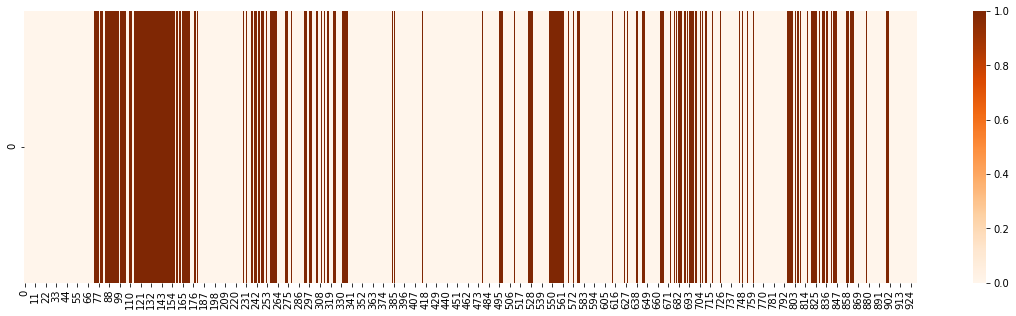

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(ans1[['predicted_output']].as_matrix().T, cmap = 'Oranges')
plt.savefig('pred_heatmap.png')
plt.show()

j:\shared\omsa\sem3\dva\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


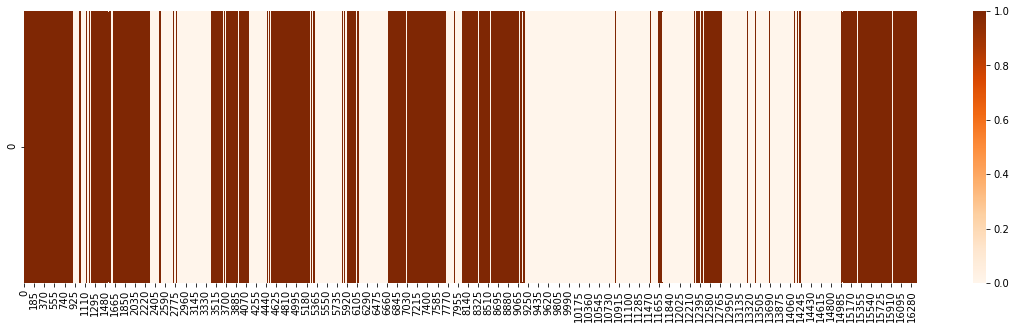

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(ans2[['predicted_output']].as_matrix().T, cmap = 'Oranges')
plt.show()

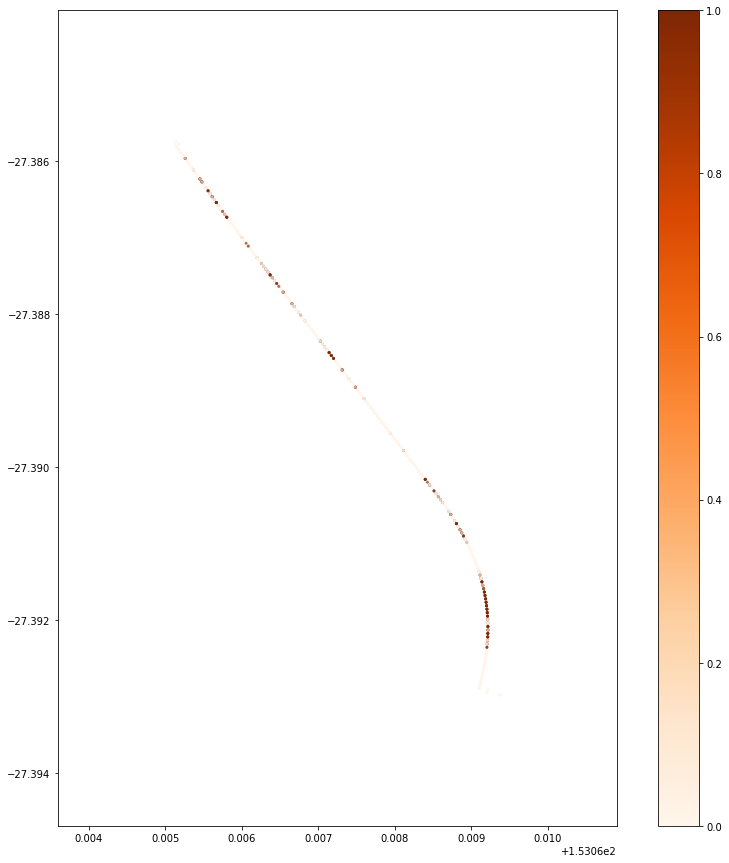

In [110]:
## plot lines according to subdivision
fig,ax = plt.subplots(figsize = (15,15))
ans1.plot(ax = ax, column = 'predicted_output', markersize = 4, cmap = 'Oranges', legend = True, alpha = 0.5)
plt.savefig('pred_geo.png')

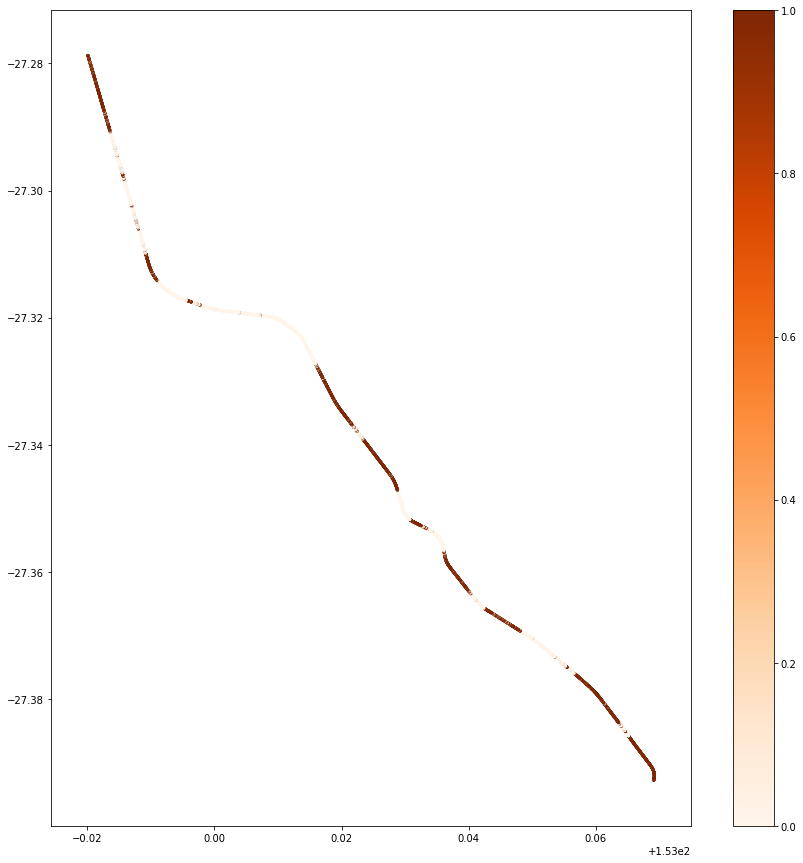

In [102]:
## plot lines according to subdivision
fig,ax = plt.subplots(figsize = (15,15))
ans2.plot(ax = ax, column = 'predicted_output', markersize = 4, cmap = 'Oranges', legend = True, alpha = 0.5)

In [104]:
df2.to_csv('test_file1.csv')

In [105]:
df1.to_csv('test_file2.csv')

In [106]:
with open('test_file1.pickle', 'wb') as f:
    pickle.dump(df2, f)

In [107]:
with open('test_file2.pickle', 'wb') as f:
    pickle.dump(df1, f)

In [111]:
with open('test_output1.pickle', 'wb') as f:
    pickle.dump(ans2, f)

In [112]:
ans2.head()

,METRAGE,predicted_output,longitude,latitude,geometry
23409,10.889,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23413,10.890,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23417,10.891,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23421,10.892,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23425,10.893,0,153.069104,-27.392894,POINT (153.06910 -27.39289)


In [113]:
df2.head()

,Unnamed: 0,METRAGE,Date,AC LN,AC VT,CON F,GAUGE,GR HT,OV HT,SUPER,...,Right.2,Right.3,Sleeper_type,Start KM,Sub-division,Track ID,Volume (cubic m),Volume (cubic m).1,Volume (cubic m).2,predicted_output
23409,21,10.889,NaN,0.4,0.4,13.5,1076.0,-27.6,-344.5,-4.0,...,NaN,NaN,NaN,10.8881,NaN,401.0,-0.127,-0.124,4.602,0
23413,25,10.890,NaN,0.0,0.1,13.6,1075.5,-29.4,-340.9,-3.4,...,NaN,NaN,NaN,10.8881,NaN,401.0,-0.127,-0.124,4.602,0
23417,29,10.891,NaN,0.4,0.3,14.1,1075.0,-31.3,-338.3,-3.5,...,NaN,NaN,NaN,10.8881,NaN,401.0,-0.127,-0.124,4.602,0
23421,33,10.892,NaN,0.5,0.4,13.9,1075.0,-33.0,-336.1,-3.8,...,NaN,NaN,NaN,10.8881,NaN,401.0,-0.127,-0.124,4.602,0
23425,37,10.893,NaN,0.6,0.4,14.1,1075.5,-34.8,-332.0,-3.5,...,NaN,NaN,NaN,10.8881,NaN,401.0,-0.127,-0.124,4.602,0


In [114]:
with open('test_output1.pickle', 'rb') as g:
    a = pickle.load(g)

In [115]:
a.head()

,METRAGE,predicted_output,longitude,latitude,geometry
23409,10.889,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23413,10.890,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23417,10.891,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23421,10.892,0,153.069104,-27.392894,POINT (153.06910 -27.39289)
23425,10.893,0,153.069104,-27.392894,POINT (153.06910 -27.39289)


In [117]:
output = ans[['METRAGE', 'predicted_output','longitude','latitude']]

In [118]:
with open('test_output1_clean.pickle', 'wb') as f:
    pickle.dump(output, f)

In [120]:
type(output)

pandas.core.frame.DataFrame

In [144]:
import os

In [147]:
os.getcwd()

'J:\\Shared\\OMSA\\sem3\\DVA\\Project_final\\dva_project-master\\src'